# Visualization and modeling (cont'd)

Python activities to complement material on linear fits in [*Measurements and their Uncertainties*](https://www.oupcanada.com/catalog/9780199566334.html) (*MU*), Chapter 5, "Data visualization and reduction."

* [Preliminaries](#Preliminaries)
* [Linear fits](#Linear-fits)
    * [Explicit formulas for uniform uncertainty](#Explicit-formulas-for-uniform-uncertainty)
        * [Parameter estimates](#Parameter-estimates)
        * [Parameter uncertainties](#Parameter-uncertainties)
    * [Exercise 2](#Exercise-2)
    * [Linear fits with `polyfit`](#Linear-fits-with-polyfit)
        * [Programming notes 1](#Programming-notes-1)
    * [Exercise 3](#Exercise-3)
* [Residual analysis](#Residual-analysis)
    * [Example: Residuals for Ohm's law measurement](#Example&#58;-Residuals-for-Ohm's-law-measurement)
        * [Programming notes 2](#Programming-notes-2)
    * [Exercise 4](#Exercise-4)
* [Summary](#Summary)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](5.0-Visualization-and-modeling.ipynb).

The following code cell includes previously used initialization commands that we will need here. The next cell imports data used in the [previous notebook](5.0-Visualization-and-modeling.ipynb) and redefines some of the variables used there.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Load data
current, voltage, alpha_voltage = np.genfromtxt("data/resistance.csv", skip_header=1, delimiter=",", unpack=True)

# Define separate current vector for model
current_model = np.linspace(0, 100)

## Linear fits
When two measurement variables such as $x$ and $y$ satisfy a functional relationship such as

$$ y = f(x;m,c) = mx + c, \label{eq:line}\tag{1}$$

we are typically interested in the values for $m$ and $c$ that offer the best fit to our measurements. Here, "best" means the values of $m$ and $c$ that minimize

$$\chi^2(m,c;\{x_k\},\{y_k\},\{\alpha_k\}) = \sum_{k=1}^N\frac{[y_k - (mx_k +  c)]^2}{\alpha_k^2}, \label{eq:lsq}\tag{2}$$

where each $y_k$ is a noisy measurement at $x_k$ with standard error $\alpha_k$. Note the asymmetry here: all the  uncertainty is in $y$, and $x$ is assumed to be *known*. Consequently, it is important that you associate the dependent variable with the measurement that has the dominant uncertainty. See *MU* Sec. 9.1 for the case when the uncertainty in $x$ can not be ignored. 

The values $\hat{m}$ and $\hat{c}$ that minimize Eq.&nbsp;(\ref{eq:lsq}) are known as the *least-squares fit parameters* for Eq.&nbsp;(\ref{eq:line}). (Recall that the "hat" notation for $\hat{m}$ and $\hat{c}$ indicates that they are *estimates* of $m$ and $c$, given the data $\{x_k,y_k\}$.) As discussed in *MU*, Eq.&nbsp;(\ref{eq:lsq}) follows from *maximizing the likelihood* that you would obtain your measurements, assuming that they satisfy Eq.&nbsp;(\ref{eq:line}) with a measurement uncertainty $\alpha_k$ for each $y_k$. We can of course consider more general, nonlinear relationships among measurent variables, but linear relationships have some advantages that are worth exploring in depth, as we will see below.

### Explicit formulas for uniform uncertainty

#### Parameter estimates
Let us restrict ourselves to the case of uniform uncertainty for now, so that $\alpha_k = \alpha$ for all $k$. Eq.&nbsp;([2](#mjx-eqn-eq:lsq)) then simplifies to

$$
\chi^2(m,c;\{x_k\},\{y_k\},\alpha) = \frac{1}{\alpha^2}\sum_{k=1}^N[y_k - (mx_k +  c)]^2, \label{eq:lsquniform}\tag{3}
$$

which we can differentiate to find the extremal conditions

\begin{align}
\left.\frac{\partial{\chi^2}}{\partial m}\right|_{\hat{m},\hat{c}} &= -\frac{2}{\alpha^2}\sum_{k=1}^N[y_k - (\hat{m}x_k + \hat{c})]x_k = 0,\\
\left.\frac{\partial{\chi^2}}{\partial c}\right|_{\hat{m},\hat{c}} &= -\frac{2}{\alpha^2}\sum_{k=1}^N[y_k - (\hat{m}x_k + \hat{c})] = 0.
\end{align}

Solving this system of equations for $\hat{m}$ and $\hat{c}$ give *MU* Eqs.&nbsp;(5.1) and (5.2) (rewritten for consistency with the notation here),

\begin{align}
\hat{c} &= \frac{\left(\sum_k x_k^2\right)\left(\sum_k y_k\right) - \left(\sum_k x_k\right)\left(\sum_k x_k y_k\right)}{\Delta}, \label{eq:c-hat}\tag{4}\\
\hat{m} &= \frac{N\sum_k x_k y_k - \left(\sum_k x_k\right)\left(\sum_k y_k\right)}{\Delta},\quad\text{with}\\
\Delta &= N\sum_k x_k^2 - \left(\sum_k x_k\right)^2. \label{eq:m-hat}\tag{5}
\end{align}

These equations express $\hat{m}$ and $\hat{c}$ *as unique, explicit functions of the data* that will *automatically* minimize $\chi^2$ in Eq.&nbsp;(\ref{eq:lsquniform}) for *any* values of $\{x_k, y_k\}$. This is one of the chief advantages of a linear fit: the least-squares fit parameters may be determined unambiguously from the data, without a search algorithm. It is important to recognize, though, that these equations will yield values even when $\{x_k, y_k\}$ do *not* satisfy a linear relationship, so we must always evaluate the quality of the fit before assigning much significance to the best-fit parameters obtained from it.

#### Parameter uncertainties

Now that we have expressed $\hat{m}$ and $\hat{c}$ as functions of $\{x_k, y_k\}$, we can use standard error propagation to compute the uncertainties in $\hat{m}$ and $\hat{c}$. To do this, we must treat each measurement $y_k$ as an independent variable in the functions $\hat{m}$ and $\hat{c}$, all with standard error $\alpha$. Recall that we have assumed the $x_k$ variables as known, so we do not need to propagate their uncertainty.

\begin{align}
\alpha_\hat{m}^2 &= \sum_{l = 1}^N\left(\frac{\partial\hat{m}}{\partial y_l}\right)^2\alpha^2 = \frac{\alpha^2}{\Delta^2}\sum_{l = 1}^N\left(Nx_l -  \sum_{k=1}^N x_k\right)^2 = \frac{N}{\Delta}\alpha^2,\\
\alpha_\hat{c}^2 &= \sum_{l = 1}^N\left(\frac{\partial\hat{c}}{\partial y_l}\right)^2\alpha^2 = \frac{\alpha^2}{\Delta^2}\sum_{l = 1}^N\left(\sum_{k=1}^N x_k^2 - x_l\sum_{k=1}^N x_k\right)^2 = \frac{\sum_{k=1}^N x_k^2}{\Delta}\alpha^2.
\end{align}

Taking the square root of these expressions, we have

\begin{align}
\alpha_{\hat{m}} &= \alpha\sqrt{\frac{N}{\Delta}}, & \alpha_{\hat{c}} &= \alpha\sqrt{\frac{\sum_{k=1}^N x_k^2}{\Delta}}, \label{eq:alpha-m-c}\tag{6}
\end{align}

which are equivalent to *MU* Eqs.&nbsp;(5.3) and (5.4) if we substitute $\alpha = \alpha_\text{CU}$, where

$$
\alpha_{CU} = \sqrt{\frac{1}{N-2}\sum_{k=1}^{N}[y_k - (\hat{m}x_k + \hat{c})]^2} \label{eq:alpha-CU}\tag{7}
$$

is known as the *common uncertainty*. The distinction here is that $\alpha$ is assumed to be *known*, just as we assume $\{x_k\}$ known, while we determine $\alpha_\text{CU}$ from the same data that we use to obtain the fit. 

Just as the data will vary from one set of measurements to another, so will $\alpha_\text{CU}$, while $\alpha$ remains fixed.  If your estimate for $\alpha$ is accurate, then the expectation of $\alpha_\text{CU}$ (ie, the average over $N\rightarrow\infty$ data sets) will be

$$
\left\langle \alpha_\text{CU}^2\right\rangle = \alpha^2,
$$

so the difference between $\alpha_\text{CU}$ and $\alpha$ is usually small. But if your estimate for $\alpha$ is *inaccurate*, then the difference between $\alpha_\text{CU}$ and $\alpha$ can be large, so comparing the two provides a good consistency check. The standard way to make this comparison is to compute

$$
\chi^2_\text{min} = \chi^2(\hat{m}, \hat{c}) = \frac{1}{\alpha^2}\sum_{k=1}^N[y_k - (\hat{m}x_k +  \hat{c})]^2 = \frac{\alpha_{CU}^2}{\alpha^2}(N-2),
$$

and check that $\chi^2_\text{min}\approx N - 2$. We compare to $N-2$ here because there are two free fit parameters, $\hat{m}$ and $\hat{c}$—in general, for a fit with $p$ fit parameters, we would compare to $N-p$. For more sophisticated ways to evaluate a fit, see the [Residual analysis](#Residual-analysis) section below.

Now let's compute the linear fit parameters to the current-voltage data in the [Demonstrating Ohm's law](#Example&#58;-Demonstrating-Ohm's-law) example. We compute the parameter uncertainty using both the given uncertainty $\alpha$ and the calculated common uncertainty $\alpha_\text{CU}$; since they are close, you would normally report the values using $\alpha$. You should use $\alpha_\text{CU}$ only if you believe that it provides the best available estimate of your measurement uncertainty. Once we obtain the best-fit parameters, we plot the data (using markers) together with the fit (as a line).

Intercept estimate with given uncertainty: (-1 ± 7) µV
Slope estimate with given uncertainty: (99.08 ± 0.13) Ω

Intercept estimate with common uncertainty: (-1 ± 5) µV
Slope estimate with common uncertainty: (99.08 ± 0.09) Ω

Chi-squared for best-fit parameters: 3.6
Degrees of freedom (N-2): 7
Given uncertainty: 10 µV
Common uncertainty: 7 µV


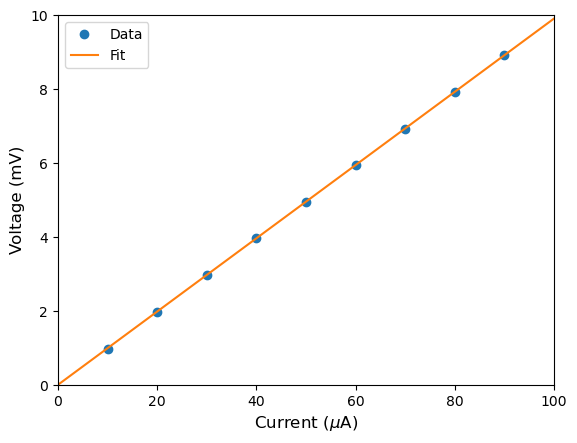

In [3]:
# Evaluate intermediate expressions
# Number of terms
N = len(current)

# Uniform uncertainty
alpha = alpha_voltage[0]

# Sums over x and y
sx = np.sum(current)
sy = np.sum(voltage)

# Sums over x**2 and x*y
sx2 = np.sum(current**2)
sxy = np.sum(current * voltage)

# Evaluate Delta
Delta = N * sx2 - sx**2

# Put it all together for m_hat and c_hat
c_hat = (sx2 * sy - sx * sxy) / Delta
m_hat = (N * sxy - sx * sy) / Delta

# Compute standard error for m_hat and c_hat
alpha_c_hat = alpha * np.sqrt(sx2 / Delta)
alpha_m_hat = alpha * np.sqrt(N / Delta)

# Compute chi-squared and common uncertainty for best-fit parameters
chi2fit = np.sum(((voltage - (m_hat * current + c_hat)) / alpha) ** 2)
alpha_cu = alpha * np.sqrt((1 / (N - 2)) * chi2fit)

# Recompute standard error for m_hat and c_hat using common uncertainty
alpha_c_hat_cu = alpha_cu * np.sqrt(sx2 / Delta)
alpha_m_hat_cu = alpha_cu * np.sqrt(N / Delta)


# Print results
print(f"Intercept estimate with given uncertainty: ({1000*c_hat:.0f} ± {1000*alpha_c_hat:.0f}) µV")
print(f"Slope estimate with given uncertainty: ({1000*m_hat:.2f} ± {1000*alpha_m_hat:.2f}) Ω")
print()
print(f"Intercept estimate with common uncertainty: ({1000*c_hat:.0f} ± {1000*alpha_c_hat_cu:.0f}) µV")
print(f"Slope estimate with common uncertainty: ({1000*m_hat:.2f} ± {1000*alpha_m_hat_cu:.2f}) Ω")
print()
print(f"Chi-squared for best-fit parameters: {chi2fit:.1f}")
print(f"Degrees of freedom (N-2): {N-2:d}")
print(f"Given uncertainty: {1000*alpha:.0f} µV")
print(f"Common uncertainty: {1000*alpha_cu:.0f} µV")
print()

# Plot data as markers
plt.plot(current, voltage, "o")

# Overlay fit as a line
plt.plot(current_model, m_hat * current_model + c_hat, "-")

# Format plot
plt.xlim(0, 100)
plt.ylim(0, 10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel(r"Current ($\mu$A)", fontsize=12)
plt.ylabel("Voltage (mV)", fontsize=12)

plt.legend(["Data", "Fit"], fontsize=10)

plt.show()

###  Exercise 2
The following cell includes code to import data from the [NIST Statistical Reference Database](https://www.itl.nist.gov/div898/strd/index.html) into the variables `x` and `y` and plots it. The data is taken from a NIST study that involved an ozone sensor calibration; the `y` variable corresponds to the ozone concentration (in nmol/mol) measured by the sensor  of a NIST customer, and the `x` variable corresponds to the measurement with the NIST sensor.  The `y` data corresponds to the first column in the data file, so we list it first in the output of [`genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). No measurement uncertainty is provided for this data, so it is appropriate to use the common uncertainty $\alpha_\text{CU}$ as an estimate. Some of the measurements are repeated for the same (or very similar) value of `x`. Use *MU* Eqs. (5.1)–(5.6) to compute the least-squares best-fit parameters $\hat{m}$ and $\hat{c}$ for the model $y=mx+c$, the common uncertainty $\alpha_\text{CU}$, and the uncertainties $\alpha_\hat{m}$ and $\alpha_\hat{c}$ in the parameters.

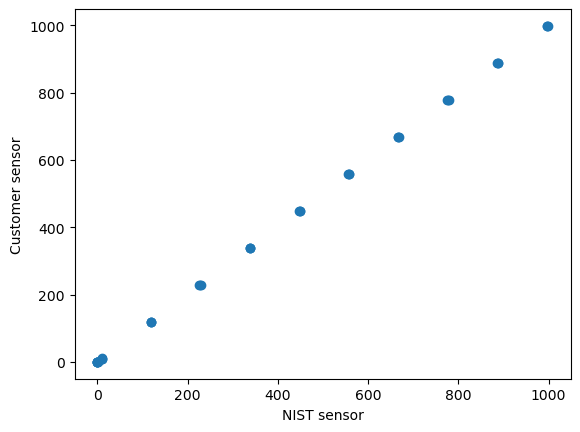

In [4]:
# Code cell for Exercise 2
# Use this cell for your response, adding cells if necessary.

# Load data
y, x = np.genfromtxt("https://www.itl.nist.gov/div898/strd/lls/data/LINKS/DATA/Norris.dat", skip_header=60, unpack=True)

# Plot data
plt.plot(x, y, "o")
plt.xlabel("NIST sensor")
plt.ylabel("Customer sensor")
plt.show()

### Linear fits with `polyfit`

NumPy includes the [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function that will fit data with a polynomial model of order $p$,

$$
y = a_0 x^p + a_1 x^{p-1} + \ldots + a_{p-1}x + a_p.
$$

While this is clearly nonlinear in $x$, it is linear in the coefficients $\{a_k\}$, which allows us to determine the best least-squares fit parameters $\{\hat{a}_k\}$ through an analysis similar to the one we developed for a fit to a line.

The code cell below shows how to use [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to compute $\hat{m}$, $\hat{c}$, $\alpha_\hat{m}$, and $\alpha_\hat{c}$ for the [Demonstrating Ohm's law](#Example&#58;-Demonstrating-Ohm's-law) example.

#### Programming notes 1

As described in the [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) documentation, the first three parameters correspond to the `x` data, the `y` data, and the polynomial degree `deg`. The option `w = 1/alpha_voltage` weights each $y_k - (mx_k + c)$ by $1/\alpha_k$, and the option `cov = 'unscaled'` will cause `polyfit` to use these weights when calculating the parameter uncertainties. To use the common uncertainty to compute the parameter uncertainties, set `cov=True`. Confirm that the results for $\alpha_{\hat{m}}$ and $\alpha_{\hat{c}}$ are the same as those obtained earlier through explicit computation.

In [5]:
# Fit the data using known parameter uncertainties
p, V = np.polyfit(current, voltage, 1, w=1 / alpha_voltage, cov="unscaled")

# Fit the data and use fit residuals to estimate parameter uncertainties
p_scaled, V_scaled = np.polyfit(current, voltage, 1, cov=True)

# Print results
print(f"Intercept estimate: ({1000*p[1]:.0f} ± {1000*np.sqrt(V[1][1]):.0f}) µV")
print(f"Slope estimate: ({1000*p[0]:.2f} ± {1000*np.sqrt(V[0][0]):.2f}) Ω")
print(f"Intercept estimate (scaled): ({1000*p_scaled[1]:.0f} ± {1000*np.sqrt(V_scaled[1][1]):.0f}) µV")
print(f"Slope estimate (scaled): ({1000*p_scaled[0]:.2f} ± {1000*np.sqrt(V_scaled[0][0]):.2f}) Ω")

Intercept estimate: (-1 ± 7) µV
Slope estimate: (99.08 ± 0.13) Ω
Intercept estimate (scaled): (-1 ± 5) µV
Slope estimate (scaled): (99.08 ± 0.09) Ω


###  Exercise 3
The following cell downloads and plots the same data from the [NIST Statistical Reference Database](https://www.itl.nist.gov/div898/strd/index.html) that you used for [Exercise 2](#Exercise-2). Use [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to compute the least-squares best-fit parameters $\hat{m}$ and $\hat{c}$ and their respective (scaled) uncertainties, $\alpha_\hat{m}$ and $\alpha_\hat{c}$, for the model $y=mx+c$. Assign these values to variable names that are different from the ones you used in [Exercise 2](#Exercise-2), and confirm that the results from [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) are the same as those given in [Exercise 2](#Exercise-2) by explicit computation.

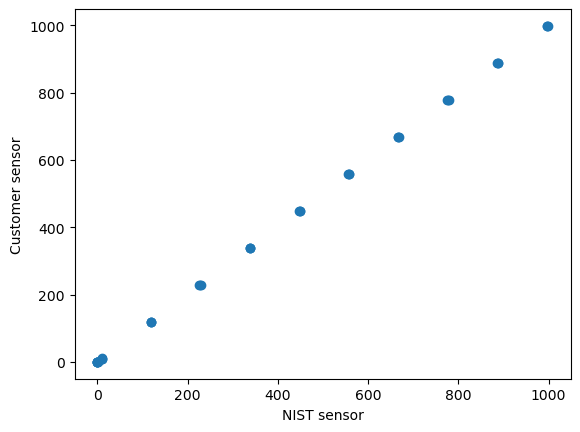

In [6]:
# Code cell for Exercise 3
# Use this cell for your response, adding cells if necessary.

y, x = np.genfromtxt("https://www.itl.nist.gov/div898/strd/lls/data/LINKS/DATA/Norris.dat", skip_header=60, unpack=True)
plt.plot(x, y, "o")
plt.xlabel("NIST sensor")
plt.ylabel("Customer sensor")
plt.show()

## Residual analysis

### Example: Residuals for Ohm's law measurement

The code cell below shows how to add a residual plot to the main plot for the [Demonstrating Ohm's law](#Example&#58;-Demonstrating-Ohm's-law) example. Here are some things to look for in a residual plot.
* The residuals should look random and consistent with a Gaussian distribution.
    * A clear pattern in the residuals is a sign of systematic error that ideally should be fixed in the experiment, but could be accommodated by revising the model function.
    * Outliers often indicate unreliability in your procedure; try to understand how it happened and take another data set if time allows
* The normalized residuals should have a variance close to one.
    * A large discrepancy between the variance of the residuals and your estimated measurement variance is worth revisiting, since it often indicates an error in the estimate of $\alpha$. If you can not identify the source of the discrepancy, you might consider scaling the measurement uncertainy.

#### Programming notes 2

So far, we have been using the [`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) interface to Matplotlib, which implicitly keeps track of the current figure and plotting area. This is fine for simple plots, but for more complex plots it is preferable to use the [`explicit "Axes" interface`](https://matplotlib.org/stable/users/explain/api_interfaces.html#the-explicit-axes-interface), which we introduce here.

 The explicit interface is also known as the ["object-oriented interface"](https://matplotlib.org/stable/users/explain/api_interfaces.html#native-matplotlib-interfaces), since it is organized around 

After computing the model curve and the fit residuals, we use the [`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function in the `pyplot` module of Matplotlib to create two plot axes within a single figure. The command `plt.subplots(2, 1, sharex=True, height_ratios=[3, 1])` returns a [`Figure`](https://matplotlib.org/stable/api/figure_api.html) object and a NumPy array containing two [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) objects, which we assign to the variables `fig` and `axs`, respectively. Setting `sharex=True` causes the two subplots to share a common x-axis and show the x tick labels for the bottom subplot. Setting `height_ratios=[3, 1]` makes the top subplot three times as high as the bottom one. 

See the Matplotlib tutorials on [Working with multiple figures and axes](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#working-with-multiple-figures-and-axes) and  [High-level methods for making grids](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#high-level-methods-for-making-grids) for more details.

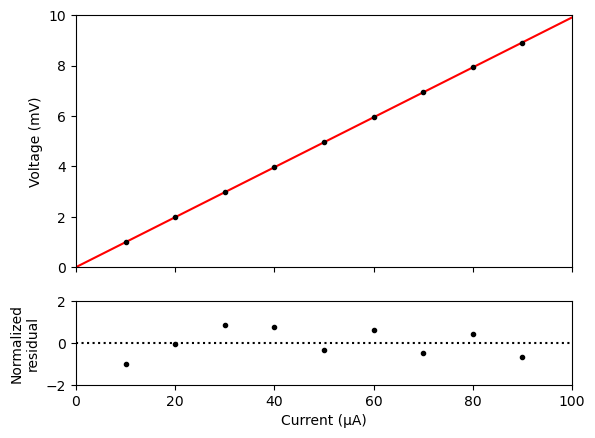

In [7]:
# Set the current range and compute the model curve
current_range = [0, 100]
current_model = np.linspace(current_range[0], current_range[1])
voltage_model = m_hat * current_model + c_hat

# Compute the measurement residuals
residuals = voltage - (m_hat * current + c_hat)

# Create figure with 2 rows and 1 column of plot axes, with shared x-axes and a 3:1 height ratio between the top and bottom panel
fig, axs = plt.subplots(2, 1, sharex=True, height_ratios=[3, 1])
# fig.subplots_adjust(hspace=0)

# Plot data in the top panel as black dots
axs[0].errorbar(current, voltage, yerr=alpha, fmt="k.")

# Plot fit in the top panel as a red line
axs[0].plot(current_model, voltage_model, "r-")

# Format top panel: set axis ranges and add y-axis label
# No x-axis label is necessary here because it will be shared with the bottom panel
axs[0].set_xlim(current_range[0], current_range[1])
axs[0].set_ylim(0, 10)
axs[0].set_ylabel("Voltage (mV)")

# Plot residuals in the bottom panel as black dots
axs[1].plot(current, residuals / alpha, "k.")

# Show zero line in the bottom panel as a black dotted line
axs[1].plot(current_range, [0, 0], "k:")

# Format bottom panel: set axis ranges and add labels to x-axis and y-axis
axs[1].set_xlim(current_range[0], current_range[1])
axs[1].set_ylim(-2, 2)
axs[1].set_xlabel("Current (µA)")
axs[1].set_ylabel("Normalized\nresidual")

# Show plot
plt.show();

### Exercise 4
Following the example above, plot the linear fit from [Exercise 2](#Exercise-2) together with the normalized residuals, using $\alpha_\text{CU}$ as the normalization constant.

In [8]:
# Code cell for Exercise 4
# Use this cell for your response, adding cells if necessary.

## Summary
Here is a list of what you should be able to do after completing this notebook.

* Explain the significance of $m, c, x_k, y_k$, and $\alpha_k$ in Eq.&nbsp;(2).
* Explain how Eq.&nbsp;(2) is used to fit a theoretical model to experimental data.
* Use Eqs.&nbsp;(4)–(7) to compute the parameters and parameter uncertainties of a linear fit when the experimental uncertainty is uniform.
* Compute $\chi^2_\mathrm{min}$ for a linear fit and use it to evaluate the fit quality.
* Use [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to compute the parameters and parameter uncertainties of a linear fit when the experimental uncertainty is uniform.
* Use residual analysis to evaluate the quality of a fit.
* Create a figure that includes experimental data with errorbars and a theoretical fit to the data in one panel, and a residual plot in a second panel.

##### About this notebook
© J. Steven Dodge, 2020. The notebook text is licensed under CC BY 4.0. See more at [Creative Commons](https://creativecommons.org/licenses/by/4.0/). The notebook code is open source under the [MIT License](https://opensource.org/licenses/MIT).